The first dataset analysed is the fifa world cup data which contains three datasets: worldcups data, worldcup players and world cup, palyers who have played in all of the world cups. The dataset is obtained from the kaggle website. The second dataset is obtained also from kaggle website and contains the fifa 19 stats for all the players. We measure hundreds of their attributes and try to analyse the best players in terms of their attributes. 

In [7]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import re 

%matplotlib inline

import os
os.listdir()

['.DS_Store',
 'archive',
 'DataScienceGroupProject.ipynb',
 'data.csv',
 'README.md',
 'Files',
 '.ipynb_checkpoints',
 '.git',
 'COMP2200 Data Science Project.pdf',
 "Jack's FIFA dataset.ipynb",
 'fifa_analytics.ipynb',
 'Jack Fifa New.ipynb']

# Data preparation and cleaning 

<ul>
<li>Analysing the data</li>
<li>Data cleaning</li>
<li>Find the missing data and removing it</li>
</ul>

Make sure that the file directory is correct for the datasets

In [8]:
players_path = 'archive/WorldCupPlayers.csv'
players_raw_df = pd.read_csv(players_path, index_col='Player Name')
players_raw_df

RoundID    MatchID Team Initials               Coach Name  \
Player Name                                                                   
Alex THEPOT           201       1096           FRA      CAUDRON Raoul (FRA)   
Oscar BONFIGLIO       201       1096           MEX         LUQUE Juan (MEX)   
Marcel LANGILLER      201       1096           FRA      CAUDRON Raoul (FRA)   
Juan CARRENO          201       1096           MEX         LUQUE Juan (MEX)   
Ernest LIBERATI       201       1096           FRA      CAUDRON Raoul (FRA)   
...                   ...        ...           ...                      ...   
ALVAREZ            255959  300186501           ARG  SABELLA Alejandro (ARG)   
KHEDIRA            255959  300186501           GER       LOEW Joachim (GER)   
AGUERO             255959  300186501           ARG  SABELLA Alejandro (ARG)   
MUSTAFI            255959  300186501           GER       LOEW Joachim (GER)   
BASANTA            255959  300186501           ARG  SABELLA Alejandro (ARG)   

                 Line-up  Shirt Number Position       Event  
Player Name                                                  
Alex THEPOT            S             0       GK         NaN  
Oscar BONFIGLIO        S             0       GK         NaN  
Marcel LANGILLER       S             0      NaN        G40'  
Juan CARRENO           S             0      NaN        G70'  
Ernest LIBERATI        S             0      NaN         NaN  
...                  ...           ...      ...         ...  
ALVAREZ                N            19      NaN         NaN  
KHEDIRA                N             6      NaN         NaN  
AGUERO                 N            20      NaN  IH46' Y65'  
MUSTAFI                N            21      NaN         NaN  
BASANTA                N            23      NaN         NaN  

[37784 rows x 8 columns]

In [105]:
players_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37784 entries, Alex THEPOT to BASANTA
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Position       4143 non-null   object
 7   Event          9069 non-null   object
dtypes: int64(3), object(5)
memory usage: 2.6+ MB


In [106]:
# checking the total match id 
players_raw_df.drop_duplicates()
players_raw_df.MatchID.nunique()

836

In [58]:
match_path = 'archive/WorldCupMatches.csv'
match_raw_df = pd.read_csv(match_path, index_col='MatchID', nrows=852)
match_raw_df

Year              Datetime                     Stage  \
MatchID                                                           
1096       1930  13 Jul 1930 - 15:00                    Group 1   
1090       1930  13 Jul 1930 - 15:00                    Group 4   
1093       1930  14 Jul 1930 - 12:45                    Group 2   
1098       1930  14 Jul 1930 - 14:50                    Group 3   
1085       1930  15 Jul 1930 - 16:00                    Group 1   
...         ...                   ...                       ...   
300186488  2014  05 Jul 2014 - 17:00             Quarter-finals   
300186474  2014  08 Jul 2014 - 17:00                Semi-finals   
300186490  2014  09 Jul 2014 - 17:00                Semi-finals   
300186502  2014  12 Jul 2014 - 17:00   Play-off for third place   
300186501  2014  13 Jul 2014 - 16:00                      Final   

                       Stadium             City Home Team Name  \
MatchID                                                          
1096                   Pocitos      Montevideo          France   
1090            Parque Central      Montevideo             USA   
1093            Parque Central      Montevideo      Yugoslavia   
1098                   Pocitos      Montevideo         Romania   
1085            Parque Central      Montevideo       Argentina   
...                        ...              ...            ...   
300186488     Arena Fonte Nova        Salvador     Netherlands   
300186474     Estadio Mineirao  Belo Horizonte          Brazil   
300186490   Arena de Sao Paulo       Sao Paulo     Netherlands   
300186502     Estadio Nacional        Brasilia          Brazil   
300186501  Estadio do Maracana  Rio De Janeiro         Germany   

           Home Team Goals  Away Team Goals Away Team Name  \
MatchID                                                      
1096                     4                1         Mexico   
1090                     3                0        Belgium   
1093                     2                1         Brazil   
1098                     3                1           Peru   
1085                     1                0         France   
...                    ...              ...            ...   
300186488                0                0     Costa Rica   
300186474                1                7        Germany   
300186490                0                0      Argentina   
300186502                0                3    Netherlands   
300186501                1                0      Argentina   

                                  Win conditions  Attendance  \
MatchID                                                        
1096                                                  4444.0   
1090                                                 18346.0   
1093                                                 24059.0   
1098                                                  2549.0   
1085                                                 23409.0   
...                                          ...         ...   
300186488  Netherlands win on penalties (4 - 3)      51179.0   
300186474                                            58141.0   
300186490    Argentina win on penalties (2 - 4)      63267.0   
300186502                                            68034.0   
300186501          Germany win after extra time      74738.0   

           Half-time Home Goals  Half-time Away Goals                 Referee  \
MatchID                                                                         
1096                          3                     0  LOMBARDI Domingo (URU)   
1090                          2                     0       MACIAS Jose (ARG)   
1093                          2                     0     TEJADA Anibal (URU)   
1098                          1                     0   WARNKEN Alberto (CHI)   
1085                          0                     0     REGO Gilberto (BRA)   
...                         ...                   ...                    

Remove some of the duplicate rows in the dataset. 

In [108]:
match_raw_df.drop_duplicates(inplace=True)

In [109]:
match_raw_df.index

Int64Index([     1096,      1090,      1093,      1098,      1085,      1095,
                 1092,      1097,      1099,      1094,
            ...
            300186474, 300186502, 300186501, 300186490, 300186488, 300186504,
            300186508, 300186459, 300186503, 300186497],
           dtype='int64', name='MatchID', length=836)

The id of the matches that have only reached the final.

In [110]:
match_raw_df[match_raw_df['Stage']=='Final'].index

Int64Index([     1087,      1134,      1174,      1278,      1343,      1463,
                 1633,      1765,      2063,      2198,       923,       393,
                   27,      3104,      8788,  43950064,  97410064, 300061509,
            300186501],
           dtype='int64', name='MatchID')

In [111]:
match_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 1096 to 300186497
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  836 non-null    int64  
 1   Datetime              836 non-null    object 
 2   Stage                 836 non-null    object 
 3   Stadium               836 non-null    object 
 4   City                  836 non-null    object 
 5   Home Team Name        836 non-null    object 
 6   Home Team Goals       836 non-null    int64  
 7   Away Team Goals       836 non-null    int64  
 8   Away Team Name        836 non-null    object 
 9   Win conditions        836 non-null    object 
 10  Attendance            835 non-null    float64
 11  Half-time Home Goals  836 non-null    int64  
 12  Half-time Away Goals  836 non-null    int64  
 13  Referee               836 non-null    object 
 14  Assistant 1           836 non-null    object 
 15  Assistant 2   

In [112]:
match_raw_df.describe()

Year  Home Team Goals  ...  Half-time Away Goals       RoundID
count   836.000000       836.000000  ...            836.000000  8.360000e+02
mean   1984.535885         1.824163  ...              0.427033  1.086093e+07
std      22.299860         1.619178  ...              0.675091  2.751802e+07
min    1930.000000         0.000000  ...              0.000000  2.010000e+02
25%    1970.000000         1.000000  ...              0.000000  2.620000e+02
50%    1990.000000         2.000000  ...              0.000000  3.370000e+02
75%    2002.000000         3.000000  ...              1.000000  2.497220e+05
max    2014.000000        10.000000  ...              5.000000  9.741060e+07

[8 rows x 7 columns]

In [59]:
world_cup_final_path = 'archive/WorldCups.csv'
world_cup_final_df = pd.read_csv(world_cup_final_path)
world_cup_final_df

Year       Country      Winner      Runners-Up        Third  \
0   1930       Uruguay     Uruguay       Argentina          USA   
1   1934         Italy       Italy  Czechoslovakia      Germany   
2   1938        France       Italy         Hungary       Brazil   
3   1950        Brazil     Uruguay          Brazil       Sweden   
4   1954   Switzerland  Germany FR         Hungary      Austria   
5   1958        Sweden      Brazil          Sweden       France   
6   1962         Chile      Brazil  Czechoslovakia        Chile   
7   1966       England     England      Germany FR     Portugal   
8   1970        Mexico      Brazil           Italy   Germany FR   
9   1974       Germany  Germany FR     Netherlands       Poland   
10  1978     Argentina   Argentina     Netherlands       Brazil   
11  1982         Spain       Italy      Germany FR       Poland   
12  1986        Mexico   Argentina      Germany FR       France   
13  1990         Italy  Germany FR       Argentina        Italy   
14  1994           USA      Brazil           Italy       Sweden   
15  1998        France      France          Brazil      Croatia   
16  2002   Korea/Japan      Brazil         Germany       Turkey   
17  2006       Germany       Italy          France      Germany   
18  2010  South Africa       Spain     Netherlands      Germany   
19  2014        Brazil     Germany       Argentina  Netherlands   

            Fourth  GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
0       Yugoslavia           70              13             18    590.549  
1          Austria           70              16             17    363.000  
2           Sweden           84              15             18    375.700  
3            Spain           88              13             22  1.045.246  
4          Uruguay          140              16             26    768.607  
5       Germany FR          126              16             35    819.810  
6       Yugoslavia           89              16             32    893.172  
7     Soviet Union           89              16             32  1.563.135  
8          Uruguay           95              16             32  1.603.975  
9           Brazil           97              16             38  1.865.753  
10           Italy          102              16             38  1.545.791  
11          France          146              24             52  2.109.723  
12         Belgium          132              24             52  2.394.031  
13         England          115              24             52  2.516.215  
14        Bulgaria          141              24             52  3.587.538  
15     Netherlands          171              32             64  2.785.100  
16  Korea Republic          161              32             64  2.705.197  
17        Portugal          147              32             64  3.359.439  
18         Uruguay          145              32             64  3.178.856  
19          Brazil          171              32             64  3.386.810

In [114]:
world_cup_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


# data cleaning
Now that we have loaded the data we can now go to the next stage of cleaning the data. The world cup data has the attendance in form of object so we will first change it into integer. 

In [115]:
world_cup_final_df['Attendance'] = world_cup_final_df['Attendance'].apply(lambda x:int("".join(x.split("."))))

In [116]:
world_cup_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 1.7+ KB


In [117]:
world_cup_final_df

Year       Country      Winner  ... QualifiedTeams MatchesPlayed Attendance
0   1930       Uruguay     Uruguay  ...             13            18     590549
1   1934         Italy       Italy  ...             16            17     363000
2   1938        France       Italy  ...             15            18     375700
3   1950        Brazil     Uruguay  ...             13            22    1045246
4   1954   Switzerland  Germany FR  ...             16            26     768607
5   1958        Sweden      Brazil  ...             16            35     819810
6   1962         Chile      Brazil  ...             16            32     893172
7   1966       England     England  ...             16            32    1563135
8   1970        Mexico      Brazil  ...             16            32    1603975
9   1974       Germany  Germany FR  ...             16            38    1865753
10  1978     Argentina   Argentina  ...             16            38    1545791
11  1982         Spain       Italy  ...             24            52    2109723
12  1986        Mexico   Argentina  ...             24            52    2394031
13  1990         Italy  Germany FR  ...             24            52    2516215
14  1994           USA      Brazil  ...             24            52    3587538
15  1998        France      France  ...             32            64    2785100
16  2002   Korea/Japan      Brazil  ...             32            64    2705197
17  2006       Germany       Italy  ...             32            64    3359439
18  2010  South Africa       Spain  ...             32            64    3178856
19  2014        Brazil     Germany  ...             32            64    3386810

[20 rows x 10 columns]

next is to convert the match_raw_df datetime column into datetime from the str object that it is in. 

In [118]:
type(match_raw_df['Datetime'][1096])

str

In [119]:
match_raw_df['Datetime']

MatchID
1096         13 Jul 1930 - 15:00 
1090         13 Jul 1930 - 15:00 
1093         14 Jul 1930 - 12:45 
1098         14 Jul 1930 - 14:50 
1085         15 Jul 1930 - 16:00 
                     ...         
300186504    05 Jul 2014 - 13:00 
300186508    29 Jun 2014 - 13:00 
300186459    29 Jun 2014 - 17:00 
300186503    01 Jul 2014 - 13:00 
300186497    01 Jul 2014 - 17:00 
Name: Datetime, Length: 836, dtype: object

In [120]:
match_raw_df['Datetime'] = pd.to_datetime(match_raw_df['Datetime'])

In [121]:
match_raw_df['Datetime']

MatchID
1096        1930-07-13 15:00:00
1090        1930-07-13 15:00:00
1093        1930-07-14 12:45:00
1098        1930-07-14 14:50:00
1085        1930-07-15 16:00:00
                    ...        
300186504   2014-07-05 13:00:00
300186508   2014-06-29 13:00:00
300186459   2014-06-29 17:00:00
300186503   2014-07-01 13:00:00
300186497   2014-07-01 17:00:00
Name: Datetime, Length: 836, dtype: datetime64[ns]

In [122]:
match_df = match_raw_df.copy()

# Exploratory data analysis and visualization

In [123]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12,6)

# Q1 How has attendance of the world cup been varying across time from 1930 to 2014

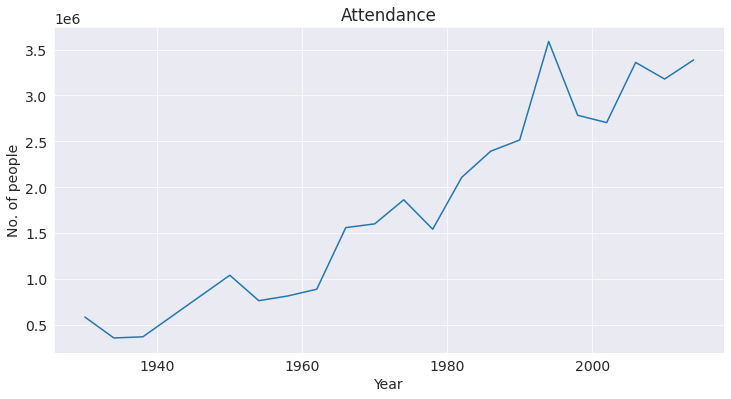

In [124]:
plt.figure(figsize=(12,6))
plt.title('Attendance')
plt.xlabel('Year')
plt.ylabel('No. of people')
plt.plot(world_cup_final_df['Year'], world_cup_final_df['Attendance'])

The figure above shows the number of people that have been attending the world cup tournament. We can see that at the mid 1930s the number really decreased. But it has been steadliy been increasing. 

# Q2 Which country has the highest number of wins in the world CUp?

Text(0.5, 1.0, 'Which country has the most wins in the Fifa World Cup?')

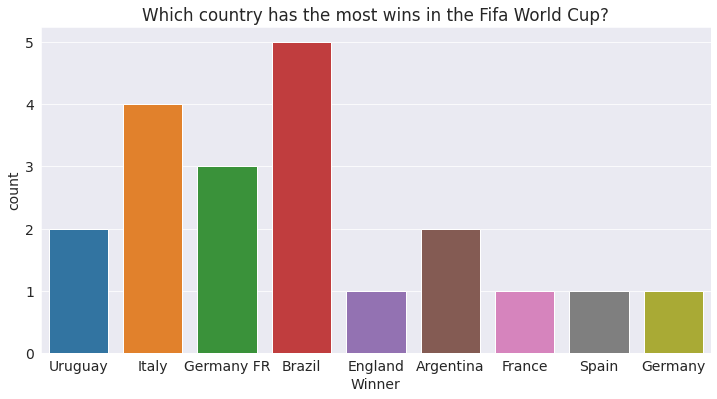

In [125]:
plt.figure(figsize=(12,6))
sns.countplot(data=world_cup_final_df, x='Winner')
plt.title('Which country has the most wins in the Fifa World Cup?')

It is Brazil followed by Italy and Germany.

# Q3 The number of matches that each world cup season has had?

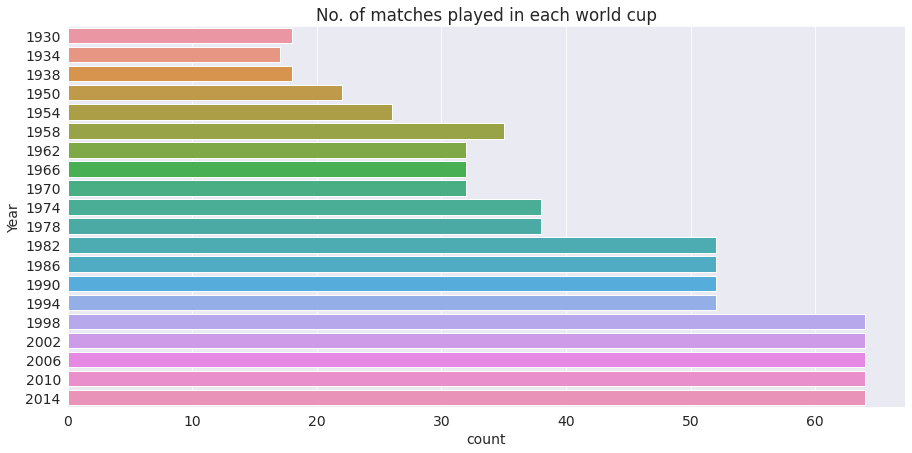

In [126]:
plt.figure(figsize=(15,7))
plt.title('No. of matches played in each world cup')
sns.countplot(data=match_df, y='Year')

# Q4) In which country has the highest number of world cup matches been played at

In [127]:
match_df[match_df['Year']==2014]

Year            Datetime  ... Home Team Initials Away Team Initials
MatchID                              ...                                      
300186456  2014 2014-06-12 17:00:00  ...                BRA                CRO
300186492  2014 2014-06-13 13:00:00  ...                MEX                CMR
300186510  2014 2014-06-13 16:00:00  ...                ESP                NED
300186473  2014 2014-06-13 18:00:00  ...                CHI                AUS
300186471  2014 2014-06-14 13:00:00  ...                COL                GRE
...         ...                 ...  ...                ...                ...
300186504  2014 2014-07-05 13:00:00  ...                ARG                BEL
300186508  2014 2014-06-29 13:00:00  ...                NED                MEX
300186459  2014 2014-06-29 17:00:00  ...                CRC                GRE
300186503  2014 2014-07-01 13:00:00  ...                ARG                SUI
300186497  2014 2014-07-01 17:00:00  ...                BEL                USA

[64 rows x 19 columns]

In [128]:
match_df[match_df['Year']==2014]['City'].value_counts()

Brasilia           7
Rio De Janeiro     7
Sao Paulo          6
Fortaleza          6
Salvador           6
Belo Horizonte     6
Porto Alegre       5
Recife             5
Cuiaba             4
Curitiba           4
Natal              4
Manaus             4
Name: City, dtype: int64

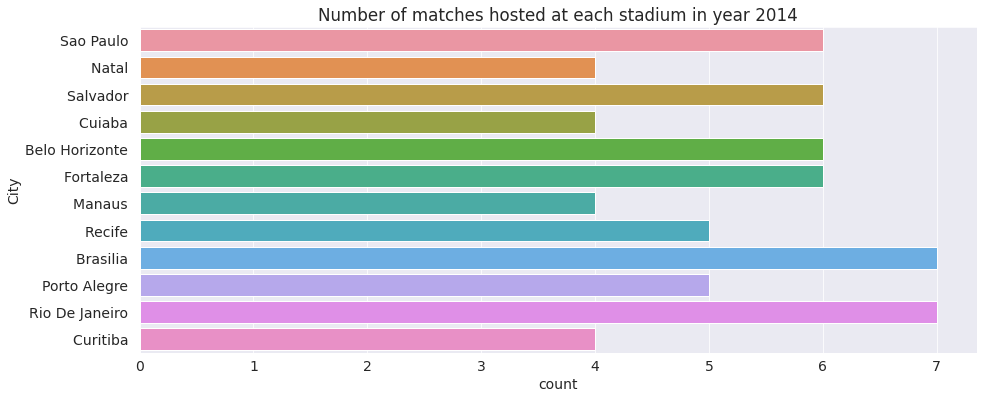

In [129]:
final_df = match_df[match_df['Year']==2014]
plt.figure(figsize=(15,6))
plt.title('Number of matches hosted at each stadium in year 2014')
sns.countplot(data=final_df, y='City')

# Q5 What is the highest number of goals that have been scored in each world cup since 1930?

In [130]:
world_cup_final_df.sort_values('GoalsScored', ascending=False)

Year       Country      Winner  ... QualifiedTeams MatchesPlayed Attendance
19  2014        Brazil     Germany  ...             32            64    3386810
15  1998        France      France  ...             32            64    2785100
16  2002   Korea/Japan      Brazil  ...             32            64    2705197
17  2006       Germany       Italy  ...             32            64    3359439
11  1982         Spain       Italy  ...             24            52    2109723
18  2010  South Africa       Spain  ...             32            64    3178856
14  1994           USA      Brazil  ...             24            52    3587538
4   1954   Switzerland  Germany FR  ...             16            26     768607
12  1986        Mexico   Argentina  ...             24            52    2394031
5   1958        Sweden      Brazil  ...             16            35     819810
13  1990         Italy  Germany FR  ...             24            52    2516215
10  1978     Argentina   Argentina  ...             16            38    1545791
9   1974       Germany  Germany FR  ...             16            38    1865753
8   1970        Mexico      Brazil  ...             16            32    1603975
7   1966       England     England  ...             16            32    1563135
6   1962         Chile      Brazil  ...             16            32     893172
3   1950        Brazil     Uruguay  ...             13            22    1045246
2   1938        France       Italy  ...             15            18     375700
1   1934         Italy       Italy  ...             16            17     363000
0   1930       Uruguay     Uruguay  ...             13            18     590549

[20 rows x 10 columns]

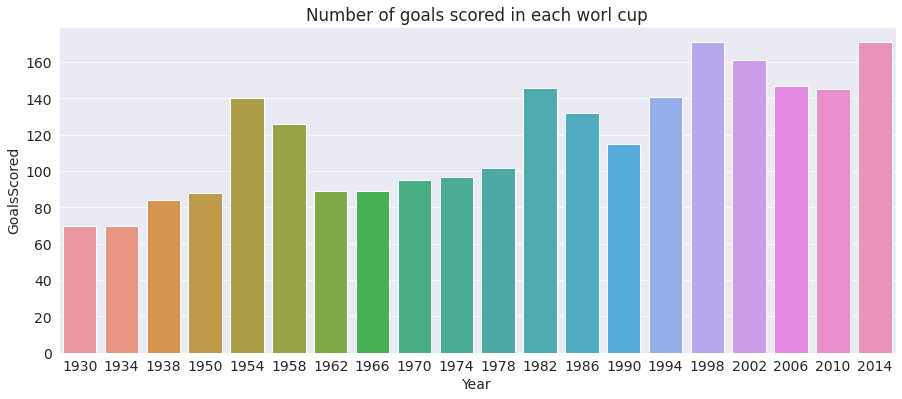

In [131]:
plt.figure(figsize=(15,6))
plt.title('Number of goals scored in each worl cup')
sns.barplot(data=world_cup_final_df, x='Year',y='GoalsScored')

# Question asking and answering 

## q1 which team has won the most of the matches at home in 2014?

First is to make a new column called the Winner and then decide which team has won the game either home team/away/tie. 


Let us first define a function which will compute the penalties. 

In [132]:
def penalty_function(x):
    temp = re.findall('\d',x)
    int_value = [int(i) for i in temp]
    if int_value[0] > int_value[1]:
        return 'Home Team Wins'
    return 'Away Team Wins'

In [133]:
home_team_goals = list(match_df['Home Team Goals'])
away_team_goals = list(match_df['Away Team Goals'])
win_condition = list(match_df['Win conditions'])
res = []

for i in range(len(home_team_goals)):
    if(home_team_goals[i] > away_team_goals[i]):
        res.append('Home Team Wins')
    elif(home_team_goals[i] < away_team_goals[i]):
        res.append('Away Team Wins')
    elif(win_condition[i]!=' '):
        res.append(penalty_function(win_condition[i]))
    else:
        res.append('Tie')

In [134]:
len(res)

836

In [135]:
match_df['Winner'] = res

Now we can show the matches that the home team has won

In [136]:
match_df.loc[match_df['Winner']=='Home Team Wins']

Year            Datetime  ... Away Team Initials          Winner
MatchID                              ...                                   
1096       1930 1930-07-13 15:00:00  ...                MEX  Home Team Wins
1090       1930 1930-07-13 15:00:00  ...                BEL  Home Team Wins
1093       1930 1930-07-14 12:45:00  ...                BRA  Home Team Wins
1098       1930 1930-07-14 14:50:00  ...                PER  Home Team Wins
1085       1930 1930-07-15 16:00:00  ...                FRA  Home Team Wins
...         ...                 ...  ...                ...             ...
300186504  2014 2014-07-05 13:00:00  ...                BEL  Home Team Wins
300186508  2014 2014-06-29 13:00:00  ...                MEX  Home Team Wins
300186459  2014 2014-06-29 17:00:00  ...                GRE  Home Team Wins
300186503  2014 2014-07-01 13:00:00  ...                SUI  Home Team Wins
300186497  2014 2014-07-01 17:00:00  ...                USA  Home Team Wins

[494 rows x 20 columns]

In [137]:
match_df.iloc[1]['Home Team Name']

'USA'

In [138]:
match_df[(match_df['Year']==2014)&(match_df['Winner']=='Home Team Wins')]

Year            Datetime  ... Away Team Initials          Winner
MatchID                              ...                                   
300186456  2014 2014-06-12 17:00:00  ...                CRO  Home Team Wins
300186492  2014 2014-06-13 13:00:00  ...                CMR  Home Team Wins
300186473  2014 2014-06-13 18:00:00  ...                AUS  Home Team Wins
300186471  2014 2014-06-14 13:00:00  ...                GRE  Home Team Wins
300186507  2014 2014-06-14 22:00:00  ...                JPN  Home Team Wins
300186494  2014 2014-06-15 13:00:00  ...                ECU  Home Team Wins
300186496  2014 2014-06-15 16:00:00  ...                HON  Home Team Wins
300186477  2014 2014-06-15 19:00:00  ...                BIH  Home Team Wins
300186475  2014 2014-06-16 13:00:00  ...                POR  Home Team Wins
300186479  2014 2014-06-17 13:00:00  ...                ALG  Home Team Wins
300186468  2014 2014-06-19 13:00:00  ...                CIV  Home Team Wins
300186486  2014 2014-06-19 16:00:00  ...                ENG  Home Team Wins
300186466  2014 2014-06-21 13:00:00  ...                IRN  Home Team Wins
300186511  2014 2014-06-21 18:00:00  ...                BIH  Home Team Wins
300186481  2014 2014-06-22 13:00:00  ...                RUS  Home Team Wins
300186470  2014 2014-06-23 13:00:00  ...                CHI  Home Team Wins
300186455  2014 2014-06-24 17:00:00  ...                CIV  Home Team Wins
300186464  2014 2014-06-25 13:00:00  ...                IRN  Home Team Wins
300186476  2014 2014-06-26 13:00:00  ...                GHA  Home Team Wins
300186487  2014 2014-06-28 13:00:00  ...                CHI  Home Team Wins
300186491  2014 2014-06-28 17:00:00  ...                URU  Home Team Wins
300186462  2014 2014-06-30 13:00:00  ...                NGA  Home Team Wins
300186460  2014 2014-06-30 17:00:00  ...                ALG  Home Team Wins
300186461  2014 2014-07-04 17:00:00  ...                COL  Home Team Wins
300186501  2014 2014-07-13 16:00:00  ...                ARG  Home Team Wins
300186488  2014 2014-07-05 17:00:00  ...                CRC  Home Team Wins
300186504  2014 2014-07-05 13:00:00  ...                BEL  Home Team Wins
300186508  2014 2014-06-29 13:00:00  ...                MEX  Home Team Wins
300186459  2014 2014-06-29 17:00:00  ...                GRE  Home Team Wins
300186503  2014 2014-07-01 13:00:00  ...                SUI  Home Team Wins
300186497  2014 2014-07-01 17:00:00  ...                USA  Home Team Wins

[31 rows x 20 columns]

Text(0.5, 1.0, 'Most Win at home in 2014')

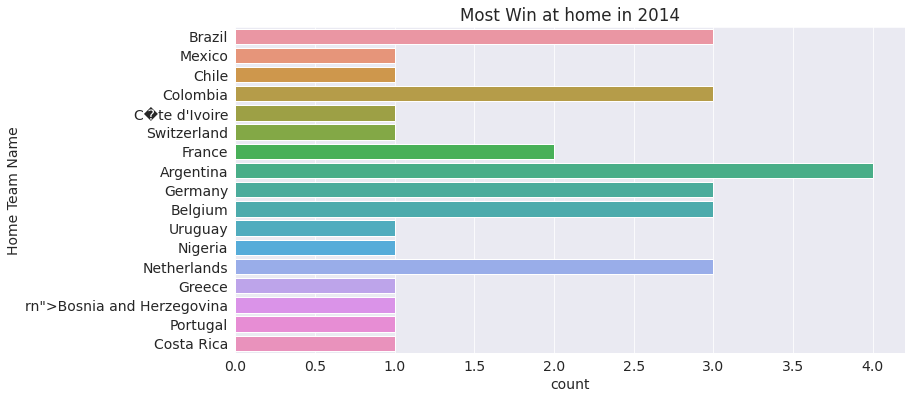

In [139]:
home_win = match_df[(match_df['Year']==2014) & (match_df['Winner']=='Home Team Wins')]
sns.countplot(data=home_win, y='Home Team Name')
plt.title('Most Win at home in 2014')

# Q2 How many matches ended up in penalties?

In [140]:
tie_res = match_df[match_df['Win conditions']!= ' ']['Win conditions'].str.contains(pat='penalties')
penalties = match_df[match_df['Win conditions']!= ' ']['Win conditions'].loc[tie_res]
penalties

MatchID
914                              win on penalties (5 - 4) 
440                       France win on penalties (3 - 4) 
575                   Germany FR win on penalties (4 - 1) 
421                      Belgium win on penalties (4 - 5) 
248          Republic of Ireland win on penalties (5 - 4) 
31                               win on penalties (2 - 3) 
28                               win on penalties (3 - 4) 
159                              win on penalties (4 - 3) 
3092                    Bulgaria win on penalties (1 - 3) 
3095                      Sweden win on penalties (4 - 5) 
3104                      Brazil win on penalties (3 - 2) 
8779                   Argentina win on penalties (4 - 3) 
8781                      France win on penalties (3 - 4) 
8785                      Brazil win on penalties (4 - 2) 
43950052                   Spain win on penalties (3 - 2) 
43950059          Korea Republic win on penalties (3 - 5) 
97410054                 Ukraine win on penaltie

In [141]:
penalties.nunique()

24

The penalties are:

In [142]:
match_df.loc[penalties.index]

Year            Datetime  ... Away Team Initials          Winner
MatchID                              ...                                   
914        1982 1982-07-08 21:00:00  ...                FRA  Home Team Wins
440        1986 1986-06-21 12:00:00  ...                FRA  Away Team Wins
575        1986 1986-06-21 16:00:00  ...                MEX  Home Team Wins
421        1986 1986-06-22 16:00:00  ...                BEL  Away Team Wins
248        1990 1990-06-25 17:00:00  ...                ROU  Home Team Wins
31         1990 1990-06-30 17:00:00  ...                ARG  Away Team Wins
28         1990 1990-07-03 20:00:00  ...                ARG  Away Team Wins
159        1990 1990-07-04 20:00:00  ...                ENG  Home Team Wins
3092       1994 1994-07-05 16:30:00  ...                BUL  Away Team Wins
3095       1994 1994-07-10 12:30:00  ...                SWE  Away Team Wins
3104       1994 1994-07-17 12:30:00  ...                ITA  Home Team Wins
8779       1998 1998-06-30 21:00:00  ...                ENG  Home Team Wins
8781       1998 1998-07-03 16:30:00  ...                FRA  Away Team Wins
8785       1998 1998-07-07 21:00:00  ...                NED  Home Team Wins
43950052   2002 2002-06-16 20:30:00  ...                IRL  Home Team Wins
43950059   2002 2002-06-22 15:30:00  ...                KOR  Away Team Wins
97410054   2006 2006-06-26 21:00:00  ...                UKR  Away Team Wins
97410057   2006 2006-06-30 17:00:00  ...                ARG  Home Team Wins
97410059   2006 2006-07-01 17:00:00  ...                POR  Away Team Wins
97410064   2006 2006-07-09 20:00:00  ...                FRA  Home Team Wins
300061497  2010 2010-06-29 16:00:00  ...                JPN  Home Team Wins
300061508  2010 2010-07-02 20:30:00  ...                GHA  Home Team Wins
300186487  2014 2014-06-28 13:00:00  ...                CHI  Home Team Wins
300186490  2014 2014-07-09 17:00:00  ...                ARG  Away Team Wins
300186488  2014 2014-07-05 17:00:00  ...                CRC  Home Team Wins
300186459  2014 2014-06-29 17:00:00  ...                GRE  Home Team Wins

[26 rows x 20 columns]

# Q3 in which year the highest attendace was recorded?

In [143]:
match_df.sort_values('Attendance', ascending=False)[['Year','Home Team Name', 'Away Team Name', 'Attendance']]

Year Home Team Name Away Team Name  Attendance
MatchID                                                  
1190       1950        Uruguay         Brazil    173850.0
1186       1950         Brazil          Spain    152772.0
1191       1950         Brazil     Yugoslavia    142429.0
1189       1950         Brazil         Sweden    138886.0
393        1986      Argentina     Germany FR    114600.0
...         ...            ...            ...         ...
1129       1934        Germany         Sweden      3000.0
1408       1958          Wales        Hungary      2823.0
1098       1930        Romania           Peru      2549.0
1094       1930          Chile         France      2000.0
300186460  2014        Germany        Algeria         NaN

[836 rows x 4 columns]

In [144]:
max_attendance = match_df.sort_values('Attendance', ascending=False)[['Home Team Name', 'Away Team Name', 'Attendance']]

Text(0.5, 1.0, 'On which year the higehst attendance was recorded?')

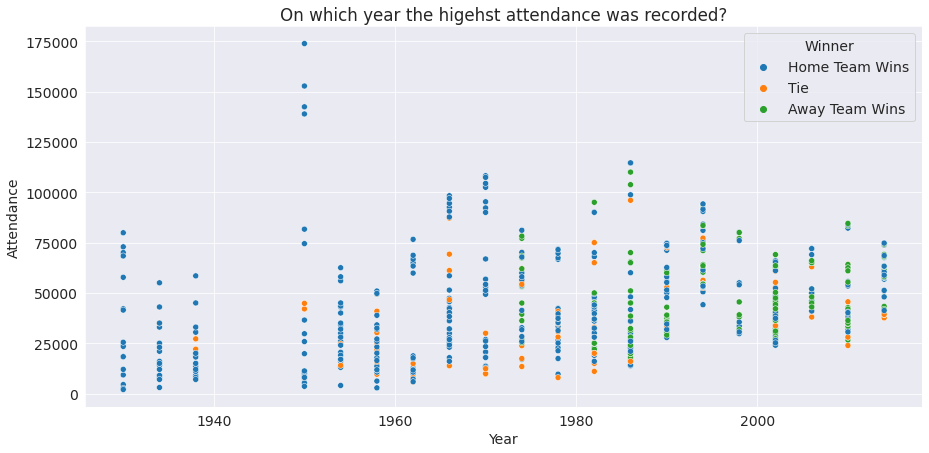

In [145]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=match_df, x='Year', y='Attendance', hue='Winner')
plt.title('On which year the higehst attendance was recorded?')

# Q4 what is most likely observed win type home/away/tie since 1930?

In [146]:
match_df['Winner'].value_counts()

Home Team Wins    494
Away Team Wins    182
Tie               160
Name: Winner, dtype: int64

([<matplotlib.patches.Wedge at 0x7f64f9f45a50>,
 [Text(0.30990572269135536, -1.0554422973536493, 'Home Team Wins'),
  Text(0.34149105293224624, 1.0456499704811482, 'Away Team Wins'),
  Text(-0.9070846467594832, 0.6222519133061979, 'Tie')],
 [Text(0.16903948510437564, -0.5756957985565359, '59.1%'),
  Text(0.1862678470539525, 0.5703545293533535, '21.8%'),
  Text(-0.4947734436869907, 0.33941013453065333, '19.1%')])

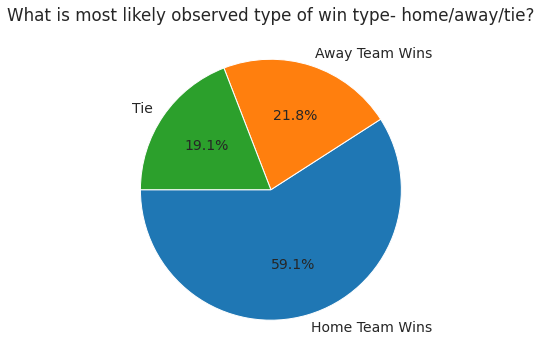

In [147]:
win_type = match_df['Winner'].value_counts()
plt.title('What is most likely observed type of win type- home/away/tie?')
plt.pie(win_type, labels=win_type.index, autopct='%1.1f%%', startangle=180)

# Q5 Top 10 countries that have won the most of the games since 1930. 

In [148]:
winner_list = list(match_df['Winner'])
home_team_name = list(match_df['Home Team Name'])
away_team_name = list(match_df['Away Team Name'])
result = []

for i in range(len(winner_list)):
    if (winner_list[i] == 'Home Team wins'):
        result.append(home_team_name[i])
    elif(winner_list[i] == 'Away Team wins'):
        result.append(away_team_name[i])
    else:
        result.append('Tie')

In [149]:
len(result)

836

In [150]:
match_df['Winning Team'] = result

In [151]:
match_df

Year            Datetime  ...          Winner Winning Team
MatchID                              ...                             
1096       1930 1930-07-13 15:00:00  ...  Home Team Wins          Tie
1090       1930 1930-07-13 15:00:00  ...  Home Team Wins          Tie
1093       1930 1930-07-14 12:45:00  ...  Home Team Wins          Tie
1098       1930 1930-07-14 14:50:00  ...  Home Team Wins          Tie
1085       1930 1930-07-15 16:00:00  ...  Home Team Wins          Tie
...         ...                 ...  ...             ...          ...
300186504  2014 2014-07-05 13:00:00  ...  Home Team Wins          Tie
300186508  2014 2014-06-29 13:00:00  ...  Home Team Wins          Tie
300186459  2014 2014-06-29 17:00:00  ...  Home Team Wins          Tie
300186503  2014 2014-07-01 13:00:00  ...  Home Team Wins          Tie
300186497  2014 2014-07-01 17:00:00  ...  Home Team Wins          Tie

[836 rows x 21 columns]

In [152]:
match_df['Winning Team'].value_counts()

Tie    836
Name: Winning Team, dtype: int64

In [153]:
temp = match_df.where(~(match_df['Winning Team']=='Tie'),np.nan, inplace=False)

In [154]:
temp['Winning Team'].value_counts().head(10)

Series([], Name: Winning Team, dtype: int64)

#Q6 Which country has won the most in terms of penalties?

In [155]:
penlaty_mathces = match_df[(match_df['Win conditions']!=' ') & (match_df['Win conditions'].str.contains(pat='penalties'))]

# FIFA Data Analysis and Visualization 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from wordcloud import WordCloud

import os



In [61]:
df = pd.read_csv("data.csv")
df.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [8]:
### Check the rows and columns of the Dataset
df.shape

(18207, 89)

In [9]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [10]:
# drop redundant columns
df.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
# view dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

## Check the Missing Values

In [12]:
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

In [14]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


Make sure to run this line of code before you go on with data visualization

In [ ]:
!pip install missingno

<AxesSubplot:>

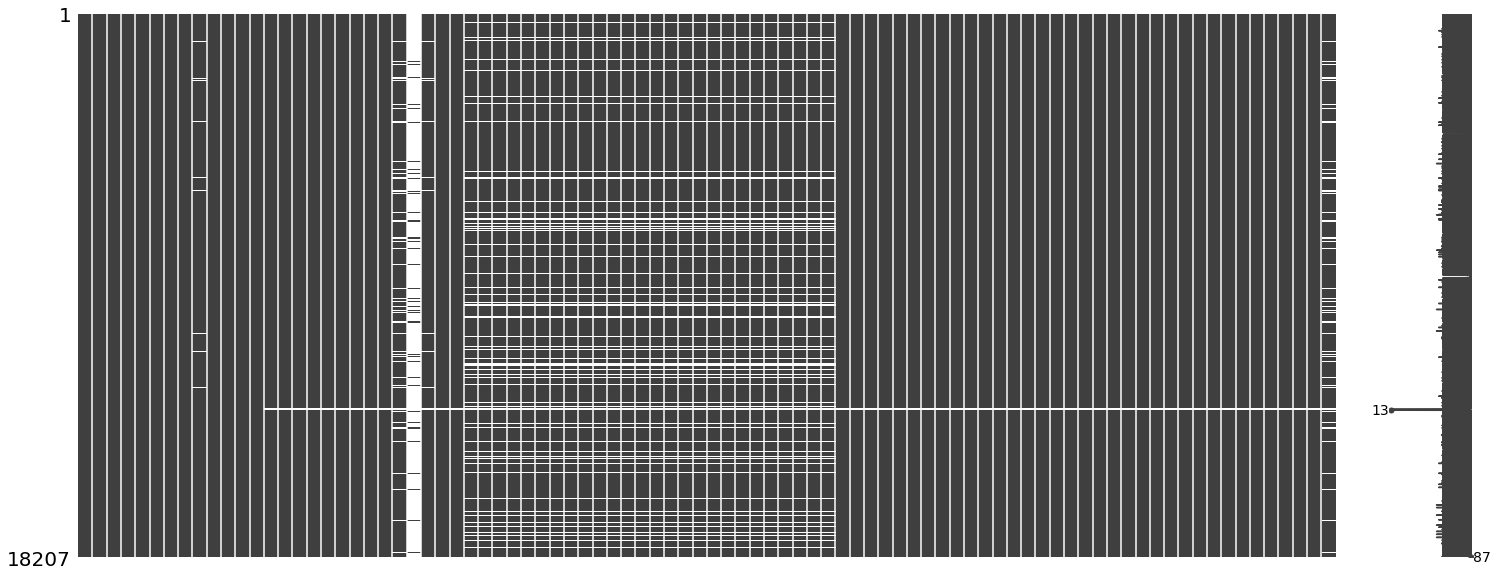

In [15]:
import missingno as msno
msno.matrix(df)

<AxesSubplot:>

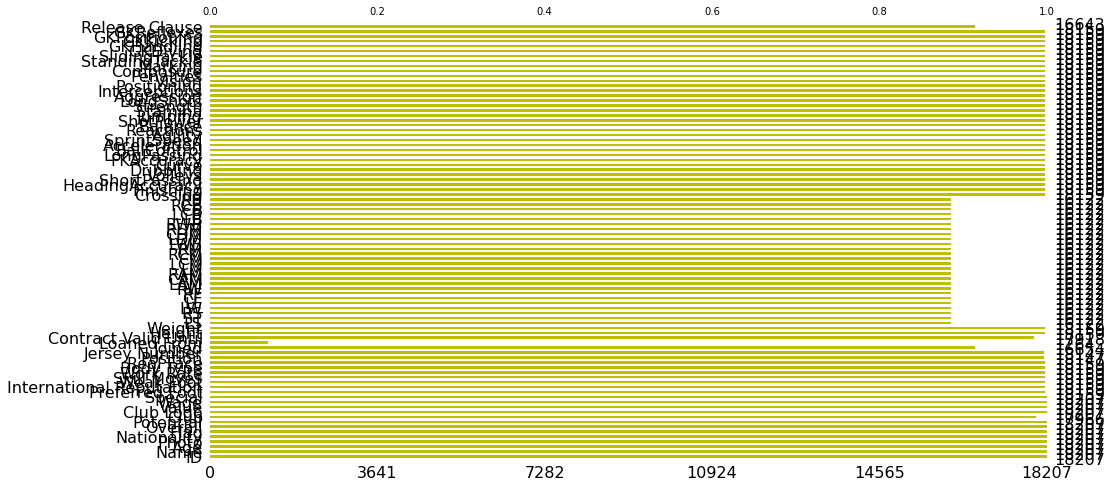

In [16]:
msno.bar(df, color = 'y', figsize = (15,8))

### Filling the Missing Values Using Mean, Mode and Median

In [17]:
#Imputing Club and Position
df['Club'].fillna('No Club', inplace = True)
df['Position'].fillna('ST', inplace = True)

In [18]:
impute_by_mean = df.loc[:, ['Crossing', 'Finishing', 'HeadingAccuracy',
                                 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
                                 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
                                 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                                 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
                                 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                 'GKKicking', 'GKPositioning', 'GKReflexes']]

In [19]:
for i in impute_by_mean.columns:
    df[i].fillna(df[i].mean(), inplace = True)


In [20]:
### These are categorical variables and will be imputed by mode.
impute_by_mode = df.loc[:, ['Body Type','International Reputation', 'Height', 'Weight', 'Preferred Foot','Jersey Number']]
for i in impute_by_mode.columns:
    df[i].fillna(df[i].mode()[0], inplace = True)

In [21]:
### The following variables are either discrete numerical or continuous numerical variables.So the will be imputed by median.'''
impute_by_median = df.loc[:, ['Weak Foot', 'Skill Moves', ]]
for i in impute_by_median.columns:
    df[i].fillna(df[i].median(), inplace = True)

In [22]:
df.fillna(0, inplace = True)

In [23]:
##### Columns remaining to be imputed'''
df.columns[df.isna().any()]

Index([], dtype='object')

In [24]:
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [25]:
df.isnull().sum()

ID                0
Name              0
Age               0
Photo             0
Nationality       0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 88, dtype: int64

## Data Visualization

## Correlation between different features

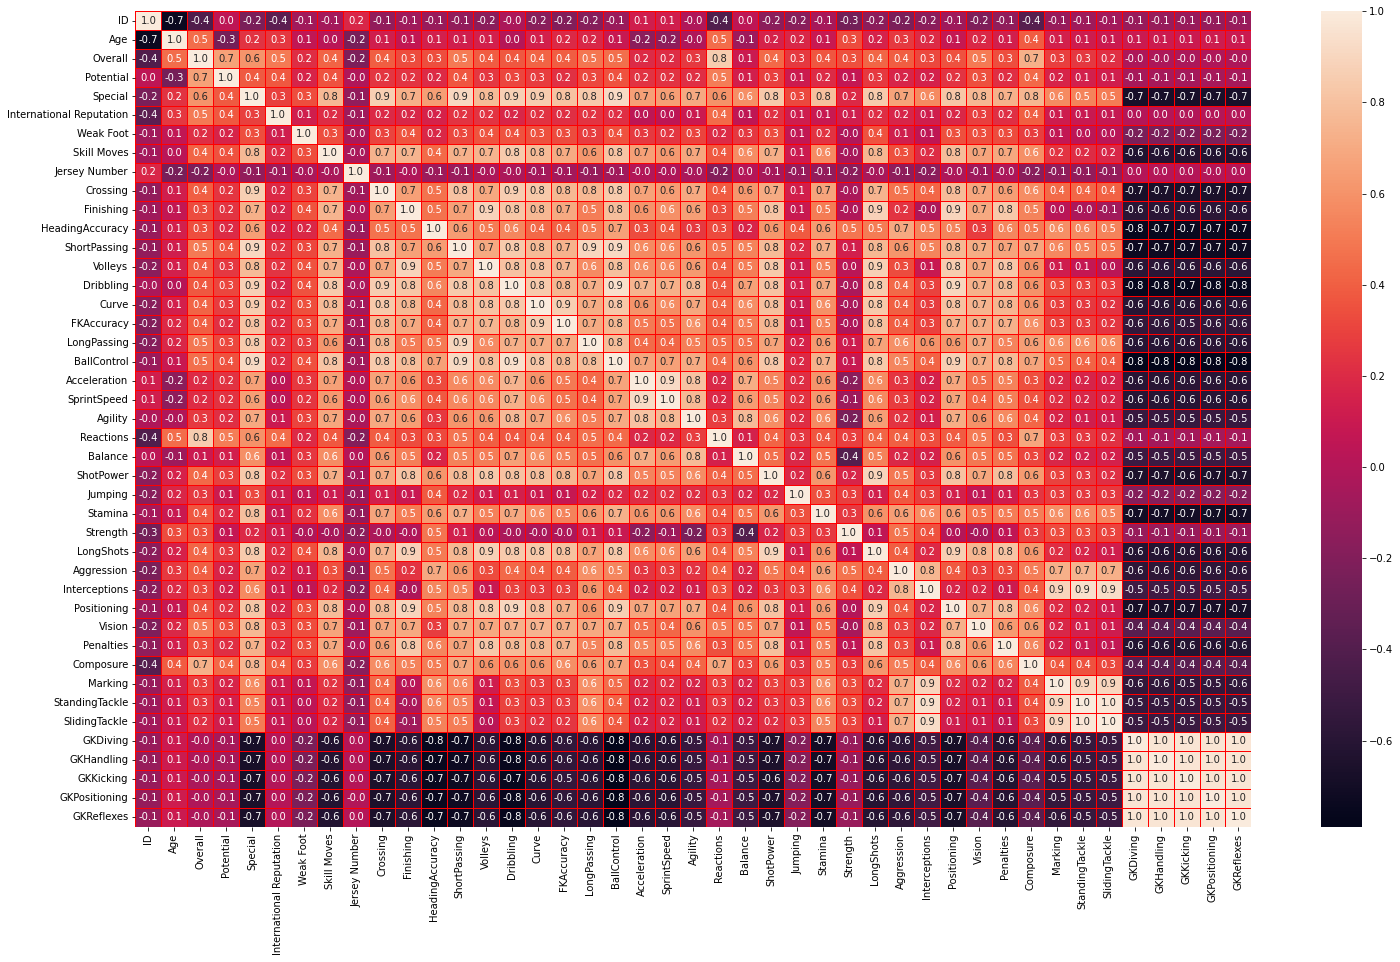

In [26]:
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

In [27]:
df['Preferred Foot'].value_counts()/len(df)

Right    0.768715
Left     0.231285
Name: Preferred Foot, dtype: float64

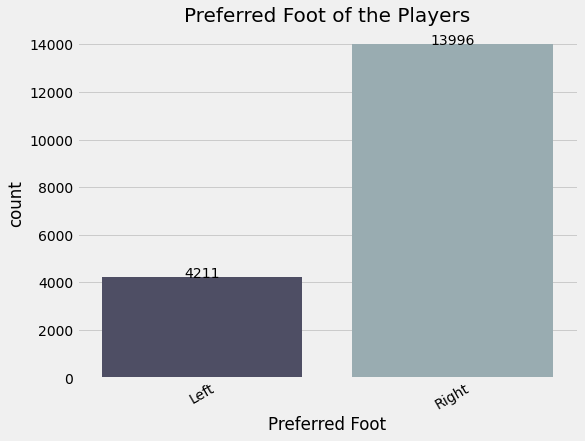

In [28]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=df['Preferred Foot'], data=df, palette = 'bone')
graph.set_title('Preferred Foot of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

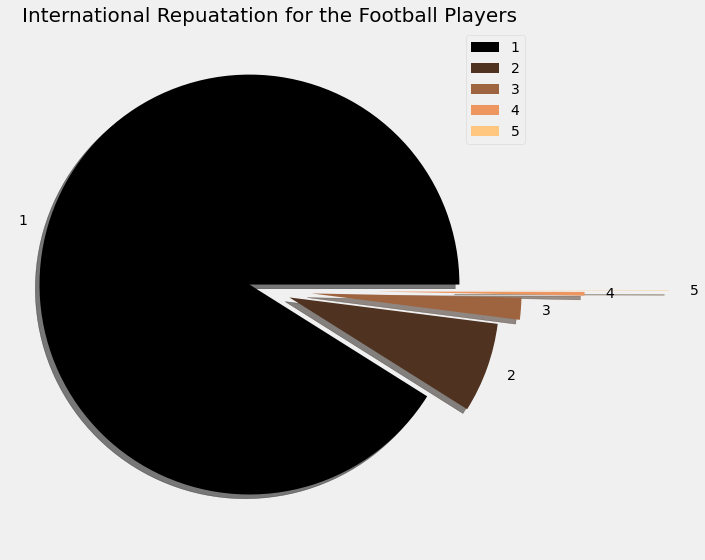

In [29]:
# plotting a pie chart to represent share of international repuatation

labels = ['1', '2', '3', '4', '5']
sizes = df['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('International Repuatation for the Football Players', fontsize = 20)
plt.legend()
plt.show()

/home/rioba/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


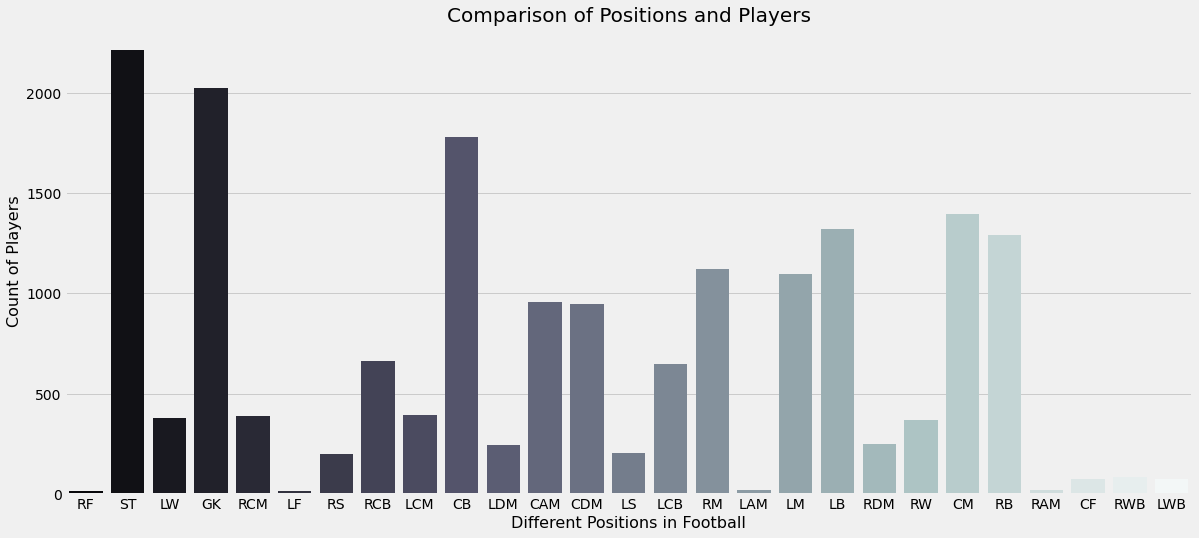

In [30]:
# different positions acquired by the players 

plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Position', data = df, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

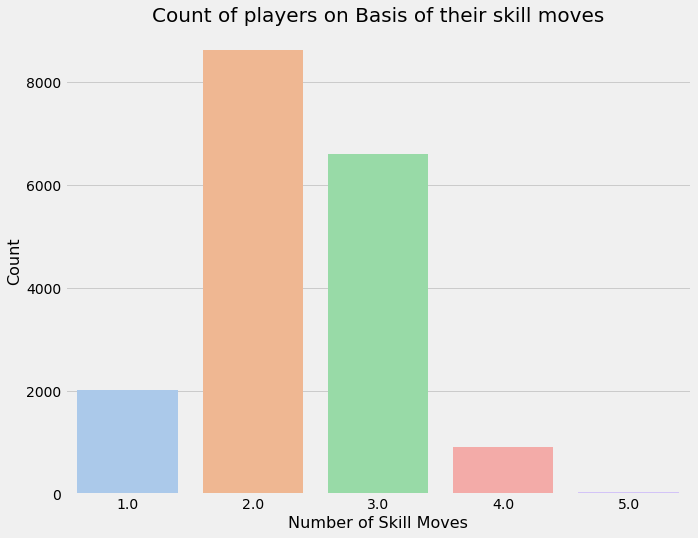

In [31]:
# Skill Moves of Players

plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'Skill Moves', data = df, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

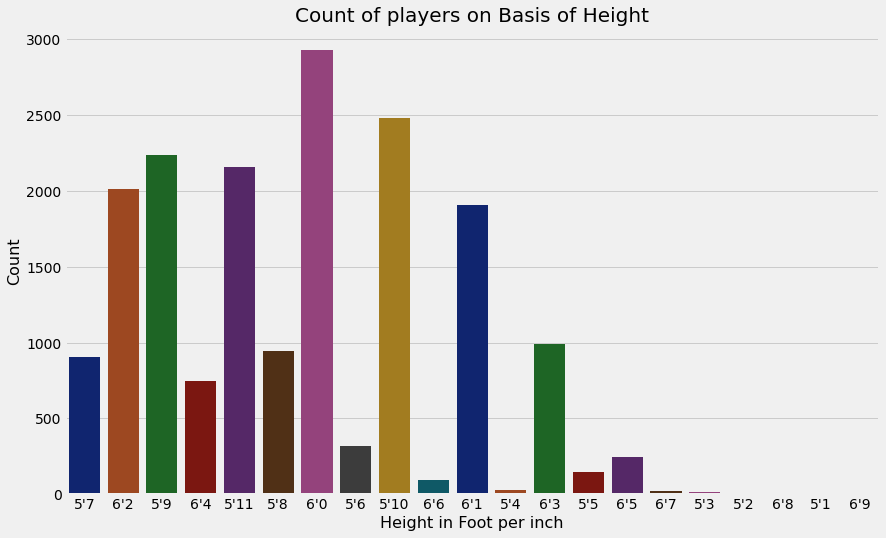

In [32]:

plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = df, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

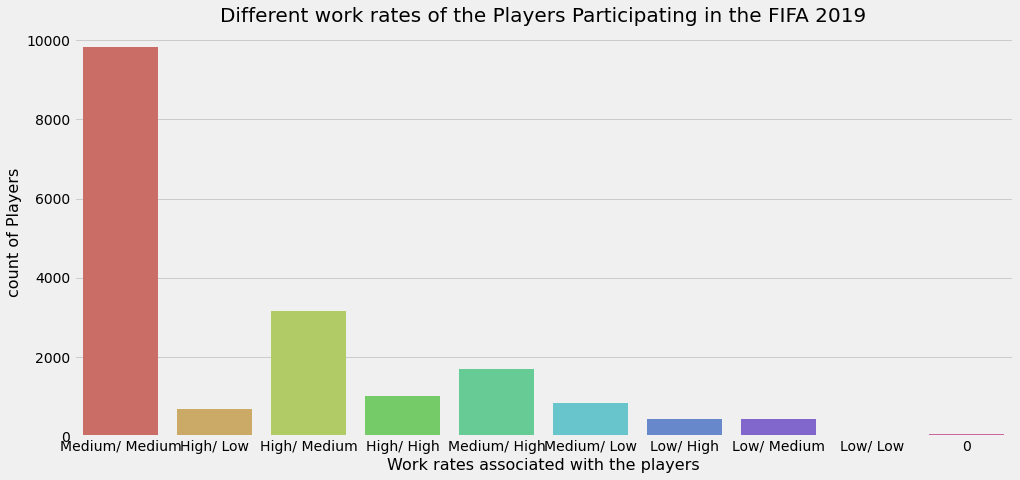

In [33]:
# To show Different Work rate of the players participating in the FIFA 2019

plt.figure(figsize = (15, 7))
plt.style.use('tableau-colorblind10')

sns.countplot(x = 'Work Rate', data = df, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

/home/rioba/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


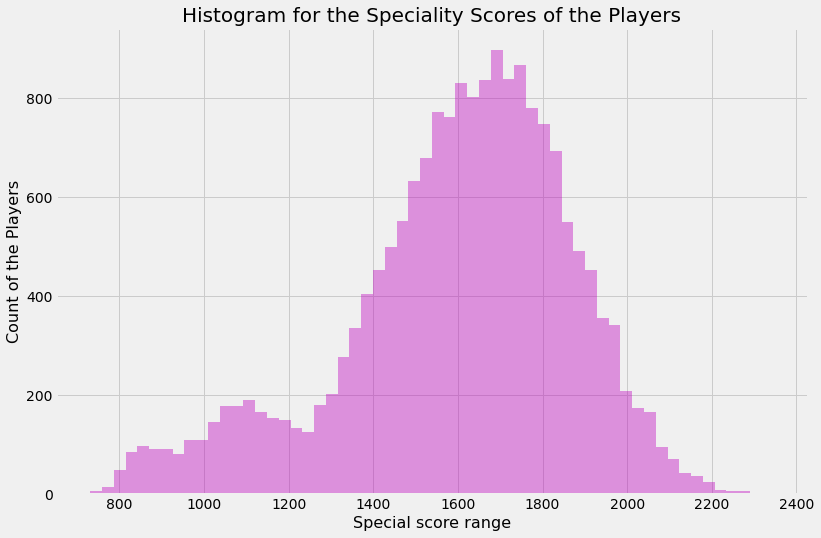

In [34]:
x = df.Special
plt.figure(figsize = (12, 8))
plt.style.use('tableau-colorblind10')

ax = sns.distplot(x, bins = 58, kde = False, color = 'm')
ax.set_xlabel(xlabel = 'Special score range', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
ax.set_title(label = 'Histogram for the Speciality Scores of the Players', fontsize = 20)
plt.show()

/home/rioba/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


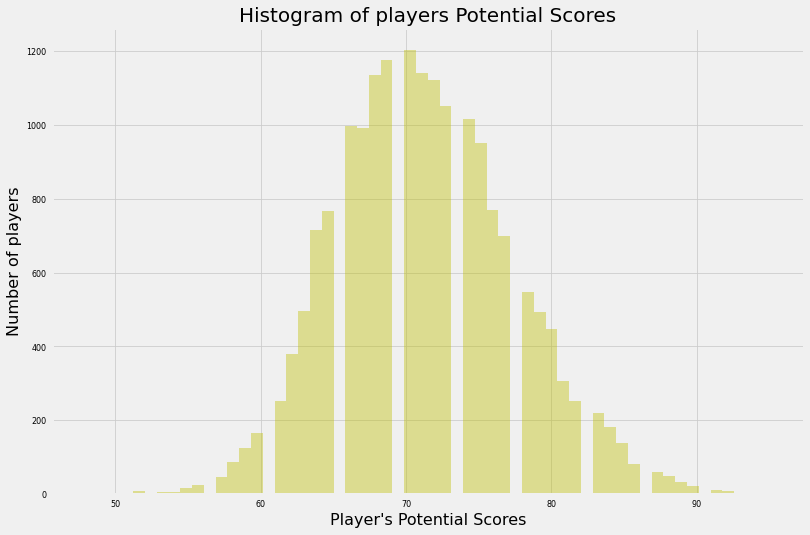

In [35]:
# To show Different potential scores of the players participating in the FIFA 2019

x = df.Potential
plt.figure(figsize=(12,8))
plt.style.use('seaborn-paper')

ax = sns.distplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player\'s Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 20)
plt.show()

/home/rioba/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


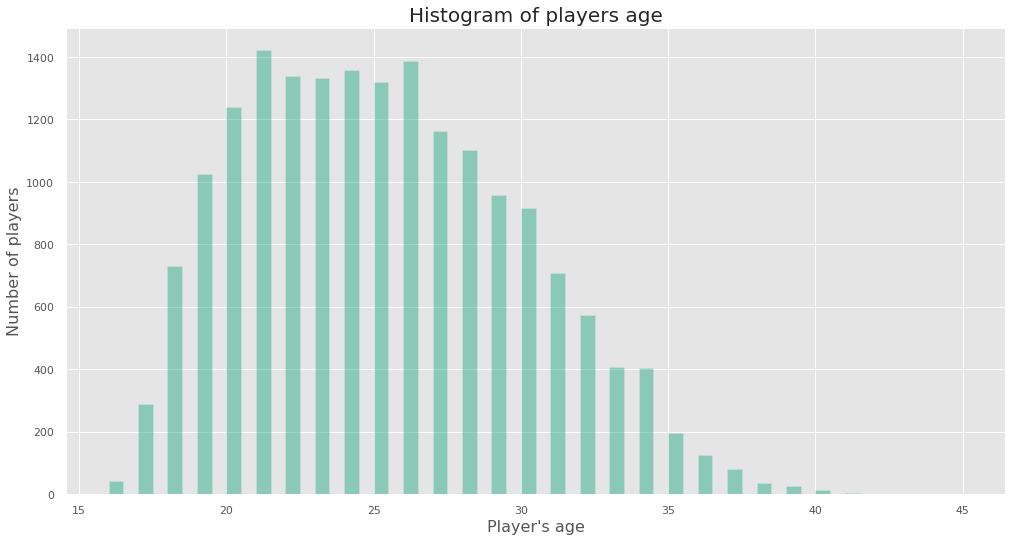

In [36]:
# To show that there are people having same age
# Histogram: number of players's age

sns.set(style = "dark", palette = "colorblind", color_codes = True)
x = df.Age
plt.figure(figsize = (15,8))
plt.style.use('ggplot')
ax = sns.distplot(x, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Player\'s age", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players age', fontsize = 20)
plt.show()

In [37]:
# best players per each position with their age, club, and nationality based on their overall scores

df.iloc[df.groupby(df['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

Position               Name  Age                      Club Nationality
17       CAM       A. Griezmann   27           Atlético Madrid      France
12        CB           D. Godín   32           Atlético Madrid     Uruguay
20       CDM    Sergio Busquets   29              FC Barcelona       Spain
271       CF       Luis Alberto   25                     Lazio       Spain
67        CM             Thiago   27         FC Bayern München       Spain
3         GK             De Gea   27         Manchester United       Spain
28       LAM       J. Rodríguez   26         FC Bayern München    Colombia
35        LB            Marcelo   30               Real Madrid      Brazil
24       LCB       G. Chiellini   33                  Juventus       Italy
11       LCM           T. Kroos   28               Real Madrid     Germany
14       LDM           N. Kanté   27                   Chelsea      France
5         LF          E. Hazard   27                   Chelsea     Belgium
33        LM      P. Aubameyang   29                   Arsenal       Gabon
21        LS          E. Cavani   31       Paris Saint-Germain     Uruguay
2         LW          Neymar Jr   26       Paris Saint-Germain      Brazil
474      LWB          N. Schulz   25       TSG 1899 Hoffenheim     Germany
129      RAM        J. Cuadrado   30                  Juventus    Colombia
69        RB        Azpilicueta   28                   Chelsea       Spain
8        RCB       Sergio Ramos   32               Real Madrid       Spain
4        RCM       K. De Bruyne   27           Manchester City     Belgium
45       RDM           P. Pogba   25         Manchester United      France
0         RF           L. Messi   31              FC Barcelona   Argentina
25        RM          K. Mbappé   19       Paris Saint-Germain      France
7         RS          L. Suárez   31              FC Barcelona     Uruguay
56        RW     Bernardo Silva   23           Manchester City    Portugal
450      RWB          M. Ginter   24  Borussia Mönchengladbach     Germany
1         ST  Cristiano Ronaldo   33                  Juventus    Portugal

In [38]:
df['Skill Moves'].value_counts()

2.0    8613
3.0    6600
1.0    2026
4.0     917
5.0      51
Name: Skill Moves, dtype: int64

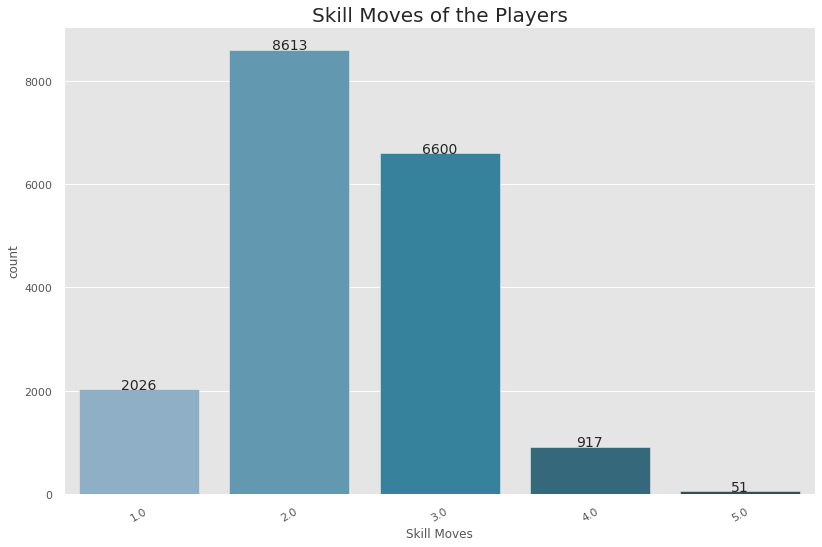

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
plt.style.use('fivethirtyeight')
graph = sns.countplot(ax=ax,x=df['Skill Moves'], data=df, palette = 'PuBuGn_d')
graph.set_title('Skill Moves of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

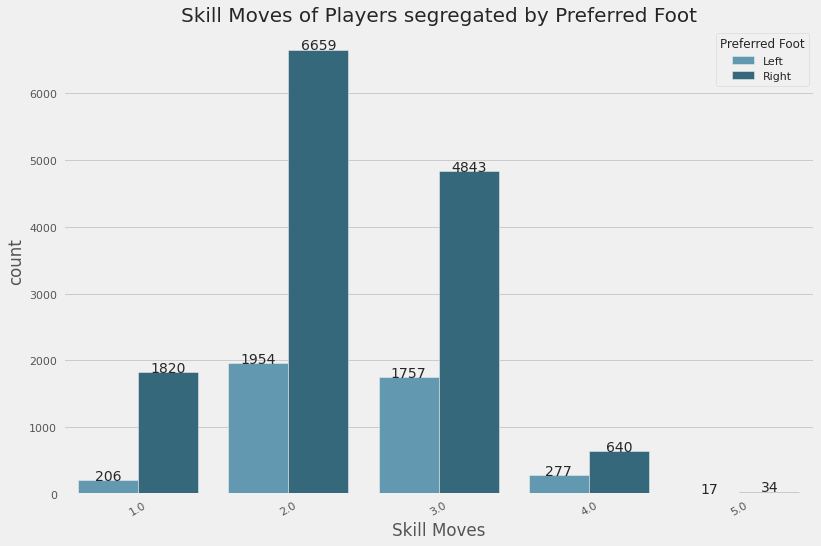

In [40]:
fig, ax = plt.subplots(figsize=(12,8))
plt.style.use('fivethirtyeight')
graph = sns.countplot(ax=ax,x=df['Skill Moves'], data=df, hue='Preferred Foot', palette = 'PuBuGn_d')
graph.set_title('Skill Moves of Players segregated by Preferred Foot'  , fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

/home/rioba/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


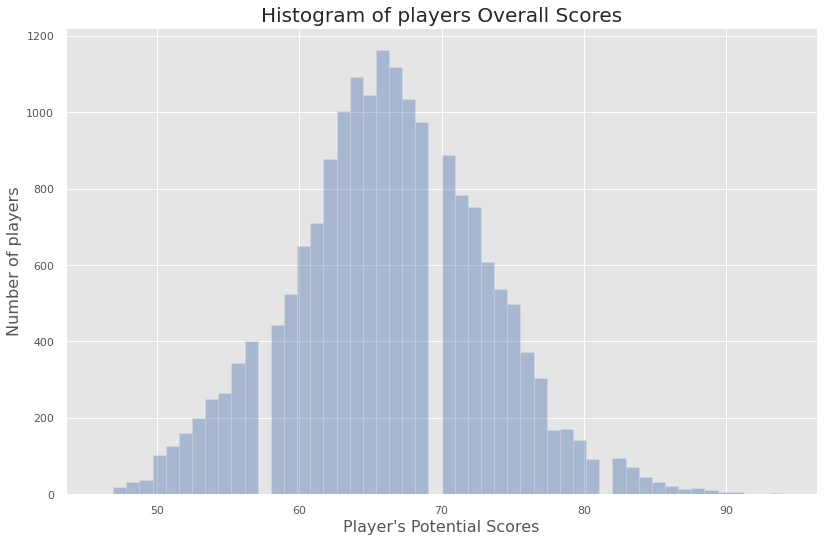

In [41]:
# To show Different overall scores of the players participating in the FIFA 2019

sns.set(style = "dark", palette = "deep", color_codes = True)
x = df.Overall
plt.figure(figsize = (12,8))
plt.style.use('ggplot')

ax = sns.distplot(x, bins = 52, kde = False, color = 'b')
ax.set_xlabel(xlabel = "Player\'s Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Overall Scores', fontsize = 20)
plt.show()

## Analyse players based on nationality

In [42]:
df['Nationality'].nunique()

164

In [43]:
df['Nationality'].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

In [44]:
top_country = df['Nationality'].value_counts().head(15)

top_country

England                1662
Germany                1198
Spain                  1072
Argentina               937
France                  914
Brazil                  827
Italy                   702
Colombia                618
Japan                   478
Netherlands             453
Sweden                  397
China PR                392
Chile                   391
Republic of Ireland     368
Mexico                  366
Name: Nationality, dtype: int64

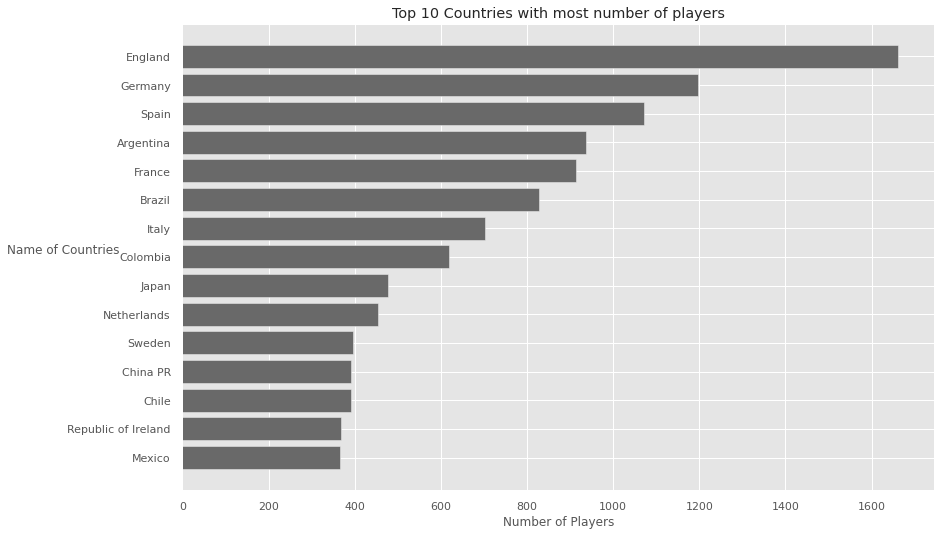

In [45]:
fig, ax = plt.subplots(figsize=(12,8))
x = top_country.values
y = top_country.index
ax.barh(y, x, align='center', color='dimgray')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Players')
ax.set_ylabel('Name of Countries', rotation=0)
ax.set_title('Top 10 Countries with most number of players')
plt.show()

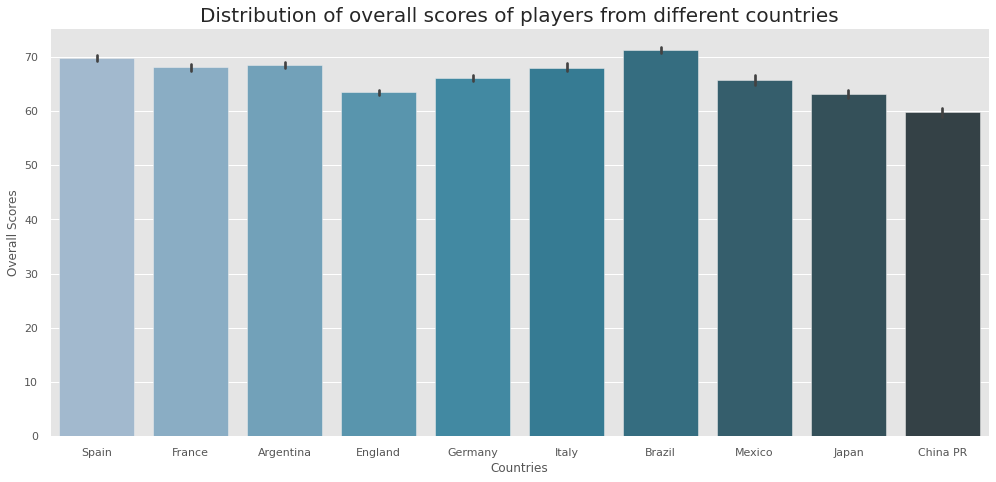

In [46]:
# Every Nations' Player and their overall scores

countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia', 'Japan', 'Mexico', 'China PR')
data_country= df.loc[df['Nationality'].isin(countries) & df['Overall']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_country['Nationality'], y = data_country['Overall'], palette = 'PuBuGn_d')
ax.set_xlabel(xlabel = 'Countries', fontsize = 12)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 12)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

## Top 10 players

In [47]:
df['Overall'].value_counts().head()

66    1163
67    1118
64    1091
65    1045
68    1035
Name: Overall, dtype: int64

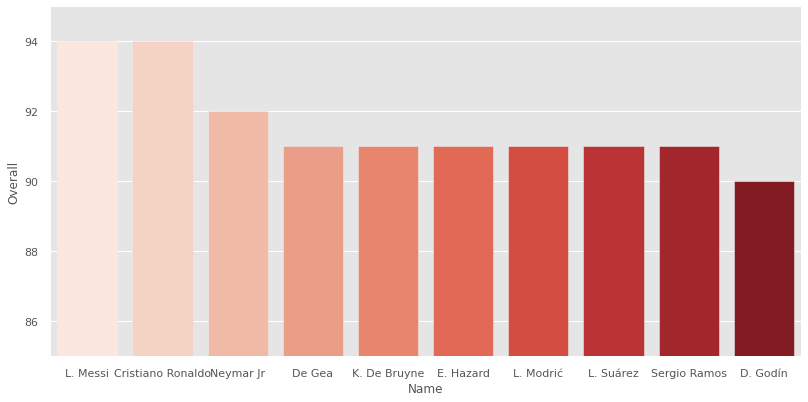

In [48]:
df_best_players = pd.DataFrame.copy(df.sort_values(by ='Overall',ascending = False ).head(10))
plt.figure(1,figsize = (12,6))
sns.barplot(x ='Name' , y = 'Overall' , data = df_best_players, palette='Reds')
plt.ylim(85,95)
plt.show()

## Data Analysis

In [49]:
### top 10 eldest players
df.sort_values(by = 'Age' , ascending = False)[['Name','Club','Nationality','Overall', 'Age' ]].head()

Name                          Club        Nationality  \
4741        O. Pérez                       Pachuca             Mexico   
18183  K. Pilkington              Cambridge United            England   
17726      T. Warner            Accrington Stanley  Trinidad & Tobago   
10545    S. Narazaki                Nagoya Grampus              Japan   
7225        C. Muñoz  CD Universidad de Concepción          Argentina   

       Overall  Age  
4741        71   45  
18183       48   44  
17726       53   44  
10545       65   42  
7225        68   41

In [50]:
### top 10 youngest players
df.sort_values(by = 'Age' , ascending = True)[['Name','Club','Nationality','Overall', 'Age' ]].head()

Name             Club Nationality  Overall  Age
18206    G. Nugent  Tranmere Rovers     England       46   16
17743    J. Olstad  Sarpsborg 08 FF      Norway       52   16
13293  H. Massengo        AS Monaco      France       62   16
16081  J. Italiano      Perth Glory   Australia       58   16
18166     N. Ayéva        Örebro SK      Sweden       48   16

In [51]:
#### Best Finisher

df.sort_values(by = 'Finishing' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','Finishing']].head()

Name               Club Nationality  Overall  Age  Finishing
0            L. Messi       FC Barcelona   Argentina       94   31       95.0
16            H. Kane  Tottenham Hotspur     England       89   24       94.0
1   Cristiano Ronaldo           Juventus    Portugal       94   33       94.0
7           L. Suárez       FC Barcelona     Uruguay       91   31       93.0
23          S. Agüero    Manchester City   Argentina       89   30       93.0

In [52]:
### fastest players

df.sort_values(by = 'SprintSpeed' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','SprintSpeed']].head()

Name                     Club Nationality  Overall  Age  \
55       L. Sané          Manchester City     Germany       86   22   
25     K. Mbappé      Paris Saint-Germain      France       88   19   
1968       Adama  Wolverhampton Wanderers       Spain       75   22   
36       G. Bale              Real Madrid       Wales       88   28   
10928     Maicon                  Livorno      Brazil       65   25   

       SprintSpeed  
55            96.0  
25            96.0  
1968          96.0  
36            95.0  
10928         95.0

In [53]:
#### Best dribbler
df.sort_values(by = 'Dribbling' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','Dribbling']].head()

Name                 Club Nationality  Overall  Age  Dribbling
0     L. Messi         FC Barcelona   Argentina       94   31       97.0
2    Neymar Jr  Paris Saint-Germain      Brazil       92   26       96.0
5    E. Hazard              Chelsea     Belgium       91   27       95.0
30        Isco          Real Madrid       Spain       88   26       94.0
94  Y. Brahimi             FC Porto     Algeria       85   28       93.0

## Over All Performance

In [54]:
#Player with maximum Potential and Overall Performance
player = str(df.loc[df['Potential'].idxmax()][1])
print('Maximum Potential : '+str(df.loc[df['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(df.loc[df['Overall'].idxmax()][1]))

Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


In [55]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],df.loc[df[pr_cols[i]].idxmax()][1]))
    i += 1

Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


In [56]:
i=0
best = []
while i < len(pr_cols):
    best.append(df.loc[df[pr_cols[i]].idxmax()][1])
    i +=1

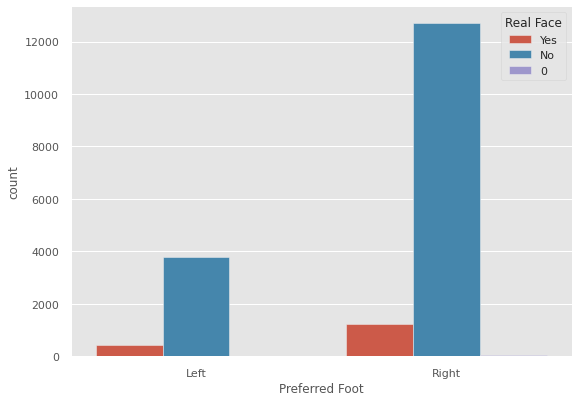

In [57]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="Preferred Foot", hue="Real Face", data=df)
plt.show()

## Regression based analysis

In [62]:
df.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

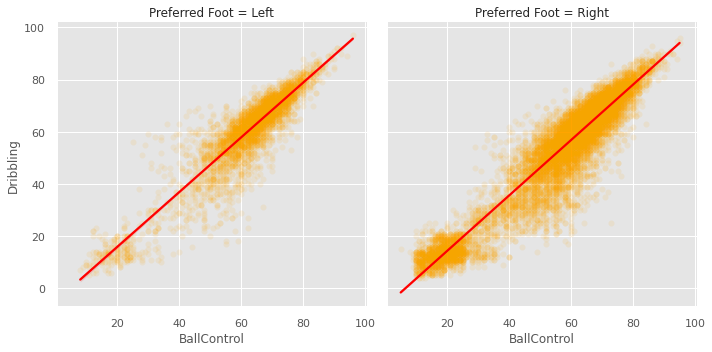

In [63]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,col = 'Preferred Foot',scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws={'color':'red'})

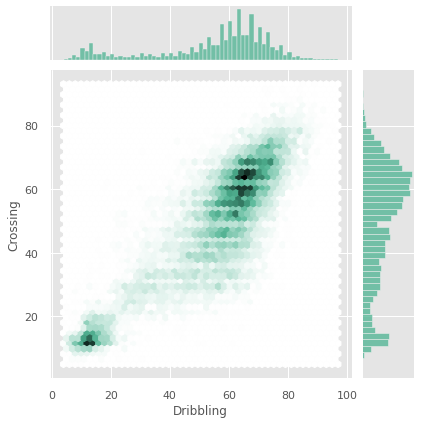

In [64]:
sns.jointplot(x=df['Dribbling'], y=df['Crossing'], kind="hex", color="#4CB391")

There is a high corrrelation between dribling, volleys, passing as seen below. 

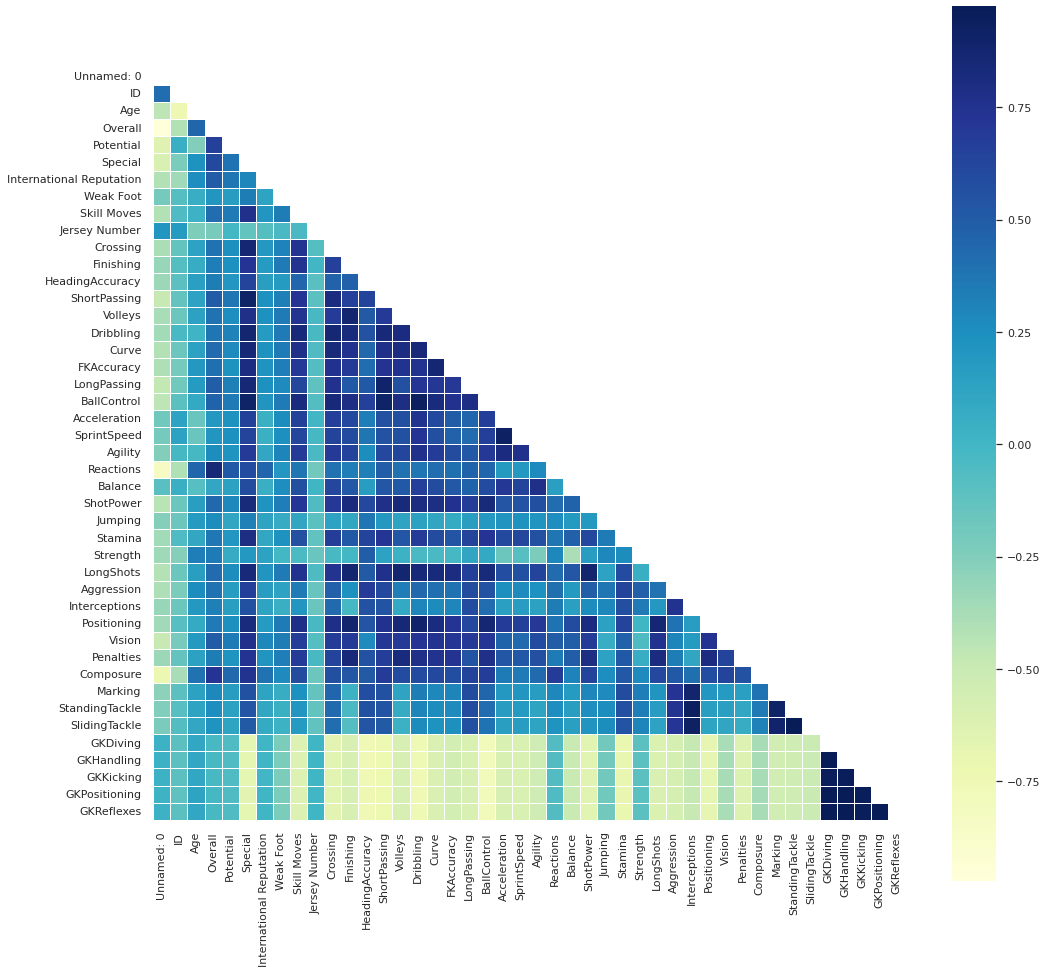

In [65]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

Let us compare the age, overall, potential, acceleration, sprintspeed, agility, stamina and strength

In [66]:
cols = ['Age','Overall','Potential','Acceleration','SprintSpeed',"Agility","Stamina",'Strength','Preferred Foot']
df_small = df[cols]
df_small.head()

Age  Overall  Potential  Acceleration  SprintSpeed  Agility  Stamina  \
0   31       94         94          91.0         86.0     91.0     72.0   
1   33       94         94          89.0         91.0     87.0     88.0   
2   26       92         93          94.0         90.0     96.0     81.0   
3   27       91         93          57.0         58.0     60.0     43.0   
4   27       91         92          78.0         76.0     79.0     90.0   

   Strength Preferred Foot  
0      59.0           Left  
1      79.0          Right  
2      49.0          Right  
3      64.0          Right  
4      75.0          Right

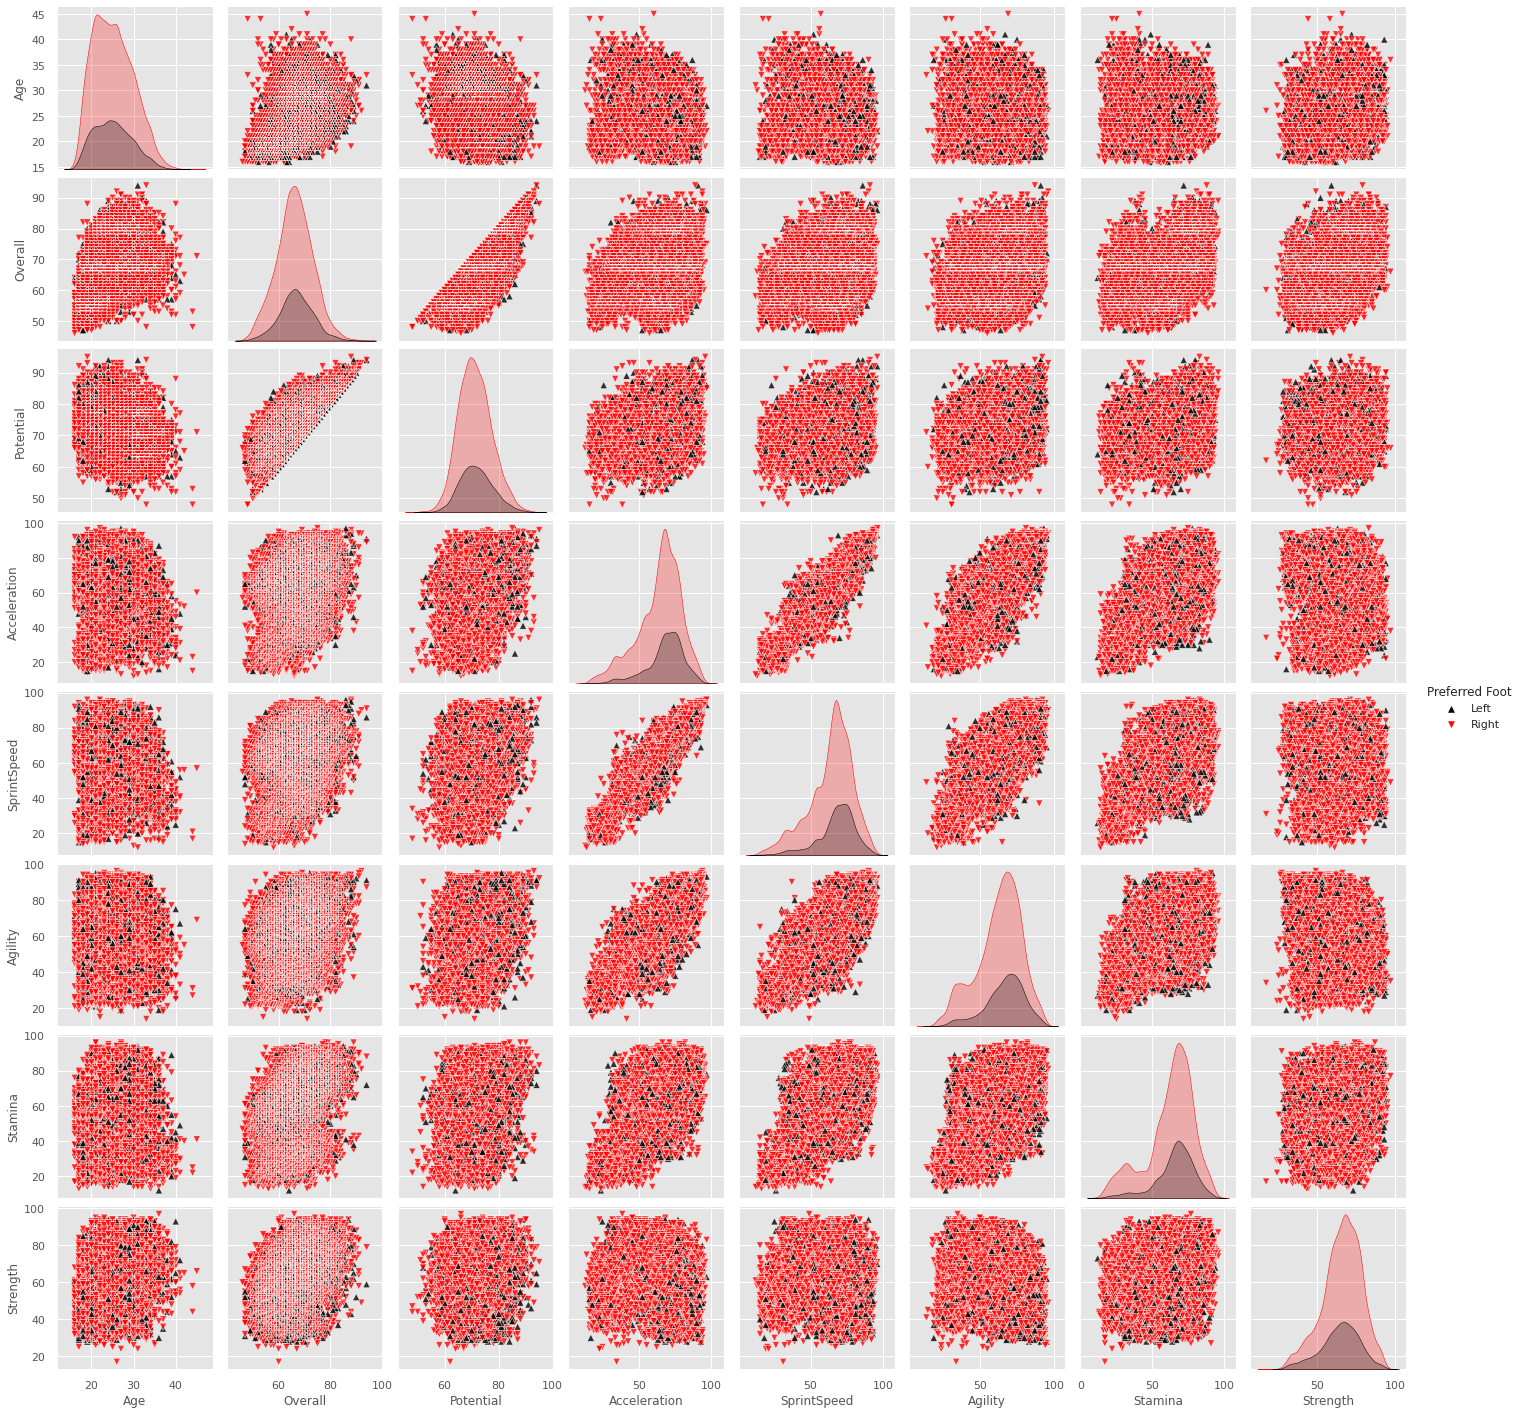

In [67]:
sns.pairplot(df_small, hue ='Preferred Foot',palette=["black", "red"],plot_kws=dict(s=50, alpha =0.8),markers=['^','v'])

From the plot we can infer many things.
Firstly, most of the people are right footed 
<ul>
<li>1.Some unusual behavior in Potential vs Overall</li>
<li>2.Accelaration and SprintSpeed follow a proper linear relationship</li>
<li>3.Agility vs SprintSpeed, Agility vs Accelaration and Agility vs Stamina have somewhat linear relationship
</ul>

In [68]:
df_model = pd.read_csv('data.csv')

In [69]:
#DROP UNNECESSARY VALUES
drop_cols = df.columns[28:54]
df_model = df_model.drop(drop_cols, axis = 1)
df_model = df_model.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
df_model = df_model.dropna()
df_model.head()

Age Nationality  Overall  Potential Preferred Foot  \
0   31   Argentina       94         94           Left   
1   33    Portugal       94         94          Right   
2   26      Brazil       92         93          Right   
3   27       Spain       91         93          Right   
4   27     Belgium       91         92          Right   

   International Reputation  Weak Foot  Skill Moves       Work Rate Real Face  \
0                       5.0        4.0          4.0  Medium/ Medium       Yes   
1                       5.0        4.0          5.0       High/ Low       Yes   
2                       5.0        5.0          5.0    High/ Medium       Yes   
3                       4.0        3.0          1.0  Medium/ Medium       Yes   
4                       4.0        5.0          4.0      High/ High       Yes   

   ... Penalties  Composure  Marking  StandingTackle  SlidingTackle  GKDiving  \
0  ...      75.0       96.0     33.0            28.0           26.0       6.0   
1  ...      85.0       95.0     28.0            31.0           23.0       7.0   
2  ...      81.0       94.0     27.0            24.0           33.0       9.0   
3  ...      40.0       68.0     15.0            21.0           13.0      90.0   
4  ...      79.0       88.0     68.0            58.0           51.0      15.0   

   GKHandling  GKKicking  GKPositioning  GKReflexes  
0        11.0       15.0           14.0         8.0  
1        11.0       15.0           14.0        11.0  
2         9.0       15.0           15.0        11.0  
3        85.0       87.0           88.0        94.0  
4        13.0        5.0           10.0        13.0  

[5 rows x 45 columns]

In [70]:
df = df_model.copy()

In [71]:
def face_to_num(df):
    if (df['Real Face'] == 'Yes'):
        return 1
    else:
        return 0
    
#Turn Preferred Foot into a binary indicator variable
def right_footed(df):
    if (df['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0

#Create a simplified position varaible to account for all player positions
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'DM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
        return 'MF'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

#Get a count of Nationalities in the Dataset, make of list of those with over 250 Players (our Major Nations)
nat_counts = df.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

#Replace Nationality with a binary indicator variable for 'Major Nation'
def major_nation(df):
    if (df.Nationality in nat_list):
        return 1
    else:
        return 0

#Create a copy of the original dataframe to avoid indexing errors
df1 = df.copy()

#Apply changes to dataset to create new column
df1['Real_Face'] = df1.apply(face_to_num, axis=1)
df1['Right_Foot'] = df1.apply(right_footed, axis=1)
df1['Simple_Position'] = df1.apply(simple_position,axis = 1)
df1['Major_Nation'] = df1.apply(major_nation,axis = 1)

#Split the Work Rate Column in two
tempwork = df1["Work Rate"].str.split("/ ", n = 1, expand = True) 
#Create new column for first work rate
df1["WorkRate1"]= tempwork[0]   
#Create new column for second work rate
df1["WorkRate2"]= tempwork[1]
#Drop original columns used
df1 = df1.drop(['Work Rate','Preferred Foot','Real Face', 'Position','Nationality'], axis = 1)
df1.head()


Age  Overall  Potential  International Reputation  Weak Foot  Skill Moves  \
0   31       94         94                       5.0        4.0          4.0   
1   33       94         94                       5.0        4.0          5.0   
2   26       92         93                       5.0        5.0          5.0   
3   27       91         93                       4.0        3.0          1.0   
4   27       91         92                       4.0        5.0          4.0   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  ...  GKHandling  \
0      84.0       95.0             70.0          90.0  ...        11.0   
1      84.0       94.0             89.0          81.0  ...        11.0   
2      79.0       87.0             62.0          84.0  ...         9.0   
3      17.0       13.0             21.0          50.0  ...        85.0   
4      93.0       82.0             55.0          92.0  ...        13.0   

   GKKicking  GKPositioning  GKReflexes  Real_Face  Right_Foot  \
0       15.0           14.0         8.0          1           0   
1       15.0           14.0        11.0          1           1   
2       15.0           15.0        11.0          1           1   
3       87.0           88.0        94.0          1           1   
4        5.0           10.0        13.0          1           1   

   Simple_Position  Major_Nation  WorkRate1  WorkRate2  
0               ST             1     Medium     Medium  
1               ST             1       High        Low  
2               AM             1       High     Medium  
3               GK             1     Medium     Medium  
4               MF             1       High       High  

[5 rows x 46 columns]

In [72]:
#Split ID as a Target value
target = df1.Overall
df2 = df1.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3630, 54) (14517, 54)
(3630,) (14517,)


In [73]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9274612352694335
RMSE : 1.8501936532367287
